## 任务六：最短路径 -- 迪杰斯特拉算法（难度：★★★★★）

实现基本功能：（包括但不限于，可以根据自己能力继续扩展）只有一个图类

　（1）初始化函数（采用邻接矩阵即可）

　（2）创建有向网（和有向图不同的是二阶矩阵中存储的是权值）

　（3）迪杰斯特拉算法实现最短路径函数
 
　（4）遍历结果，按固定格式打印出来（如果有更好地展示方式，小伙伴可以随意发挥！）

测试案例：

　**（1）案例1：**

![Image Name](https://cdn.kesci.com/upload/image/qwzjcq7gau.png?imageView2/0/w/640/h/640)

　**输出结果：**

　　　　　　　V0无法直达V1
　　　　　　　V0:V2  最短路径:10  路径为:V0-->V2
　　　　　　　V0:V3  最短路径:50  路径为:V0 --> V4 --> V3
　　　　　　　V0:V4  最短路径:30  路径为:V0-->V4
　　　　　　　V0:V5  最短路径:60  路径为:V0 --> V4 --> V3 --> V5

　**（2）案例2：**
 
![Image Name](https://cdn.kesci.com/upload/image/qwzjfrn11a.png?imageView2/0/w/640/h/640)

　** 输出结果：**
 
　　　　　　　V0:V1  最短路径:1  路径为:V0-->V1
　　　　　　　V0:V2  最短路径:8  路径为:V0 --> V1 --> V3 --> V2
　　　　　　　V0:V3  最短路径:4  路径为:V0 --> V1 --> V3
　　　　　　　V0:V4  最短路径:13  路径为:V0 --> V1 --> V3 --> V2 --> V4
　　　　　　　V0:V5  最短路径:17  路径为:V0 --> V1 --> V3 --> V2 --> V4 --> V5
			 
　【提示：如果小伙伴没有思路的话，可以参考严蔚敏老师的著作《数据结构》一书，尝试理解上面的C语言代码，在根据思路改成Python代码，仅限新手小白；如果是大佬，可以忽略提示哈】

### 1. 定义图类，包含实现迪杰斯特拉算法的函数

In [1]:
## 定义图类
class Graph():
    # 初始化函数
    def __init__(self, vexs):
        self.vexs = vexs # 存储图中顶点的数据
        n = len(vexs)
        inf = float('inf') # 表示无穷大
        self.matrix = [[inf]*n for i in range(n)] # 二维数组，记录顶点之间的关系
        for i in range(n):
            self.matrix[i][i] = 0 # 设置Vi到Vi的权值为0，其余默认为Inf无穷大
      
    # 构造有向网，和有向图不同的是二阶矩阵中存储的是权值。
    def CreateUDG(self, relation):
        for rela in relation:
            m = rela[0]
            n = rela[1]
            self.matrix[m][n] = rela[2]
        return self.matrix
    
    # 迪杰斯特拉算法
    def Dijkstra(self, start):
        inf = float('inf')
        label = [False]*len(self.vexs) # 记录从源点V0到Vi是否已被确定最短路径长度，True为确定，False为未确定
        prior = [-1]*len(self.vexs) # 记录从源点V0到终点Vi的当前最短路径上Vi的直接前驱顶点序号，默认为-1
        minest = [inf]*len(self.vexs) # 记录从源点V0到终点Vi的当前最短路径长度，默认为在∞
        
        # 初始化
        for v in range(len(self.vexs)):
            minest[v] = self.matrix[start][v]
            if minest[v] < inf: 
                prior[v] = start
            else: 
                prior[v] = -1
        label[start] = True # 刚开始V0已经确定最短路径，即设为Ture
        
        # 对其余n-1个顶点，依次进行计算
        for i in range(1, len(self.vexs)):
            v = -1 # 表示最小值所在的顶点索引
            min_ = inf
            for w in range(len(self.vexs)):
                if not label[w] and minest[w] < min_:
                    v = w # 记录下最小值的索引
                    min_ = minest[w] # 选择一条最短路径，终点为v
            label[v] = True # 将索引为v的顶点设置为已确定最短路径
            
            # 更新从V0出发到集合V-S上所有顶点的最短路径长度
            for w in range(len(self.vexs)):
                if not label[w] and (minest[v] + self.matrix[v][w]) < minest[w]:
                    minest[w] = minest[v] + self.matrix[v][w] # 更新D[w]
                    prior[w] = v
        print(label)
        print(prior)
        print(minest)
        return prior, minest
            
    # 结果遍历
    def ShowResult(self, start, prior, minest):
        V = ['V0', 'V1', 'V2', 'V3', 'V4', 'V5']
        for i in range(1, len(self.vexs)):
            if prior[i] == 0:
                print('{0}:{1}  最短路径:{2}  路径为:{3}-->{4}'.format(V[start], V[i], minest[i], V[start], V[i]))
            elif prior[i] == -1:
                print('{0}无法直达{1}'.format(V[start], V[i]))
            else:
                ver = [] # 遍历顺序
                ver.append(V[i])
                pri = prior[i]
                ver.insert(0, V[pri])
                
                while True:
                    ver.insert(0, V[prior[pri]])
                    if prior[pri] == 0:
                        break
                    pri = prior[pri]
                
                print('{0}:{1}  最短路径:{2}  路径为:'.format(V[start], V[i], minest[i]), end='')
                for v in ver:
                    if v == ver[0]:
                        print(v, end='')
                    else:
                        print(' --> {}'.format(v), end='')
                print()

### 2. 测试案例1

![Image Name](https://cdn.kesci.com/upload/image/qwzjcq7gau.png?imageView2/0/w/640/h/480)
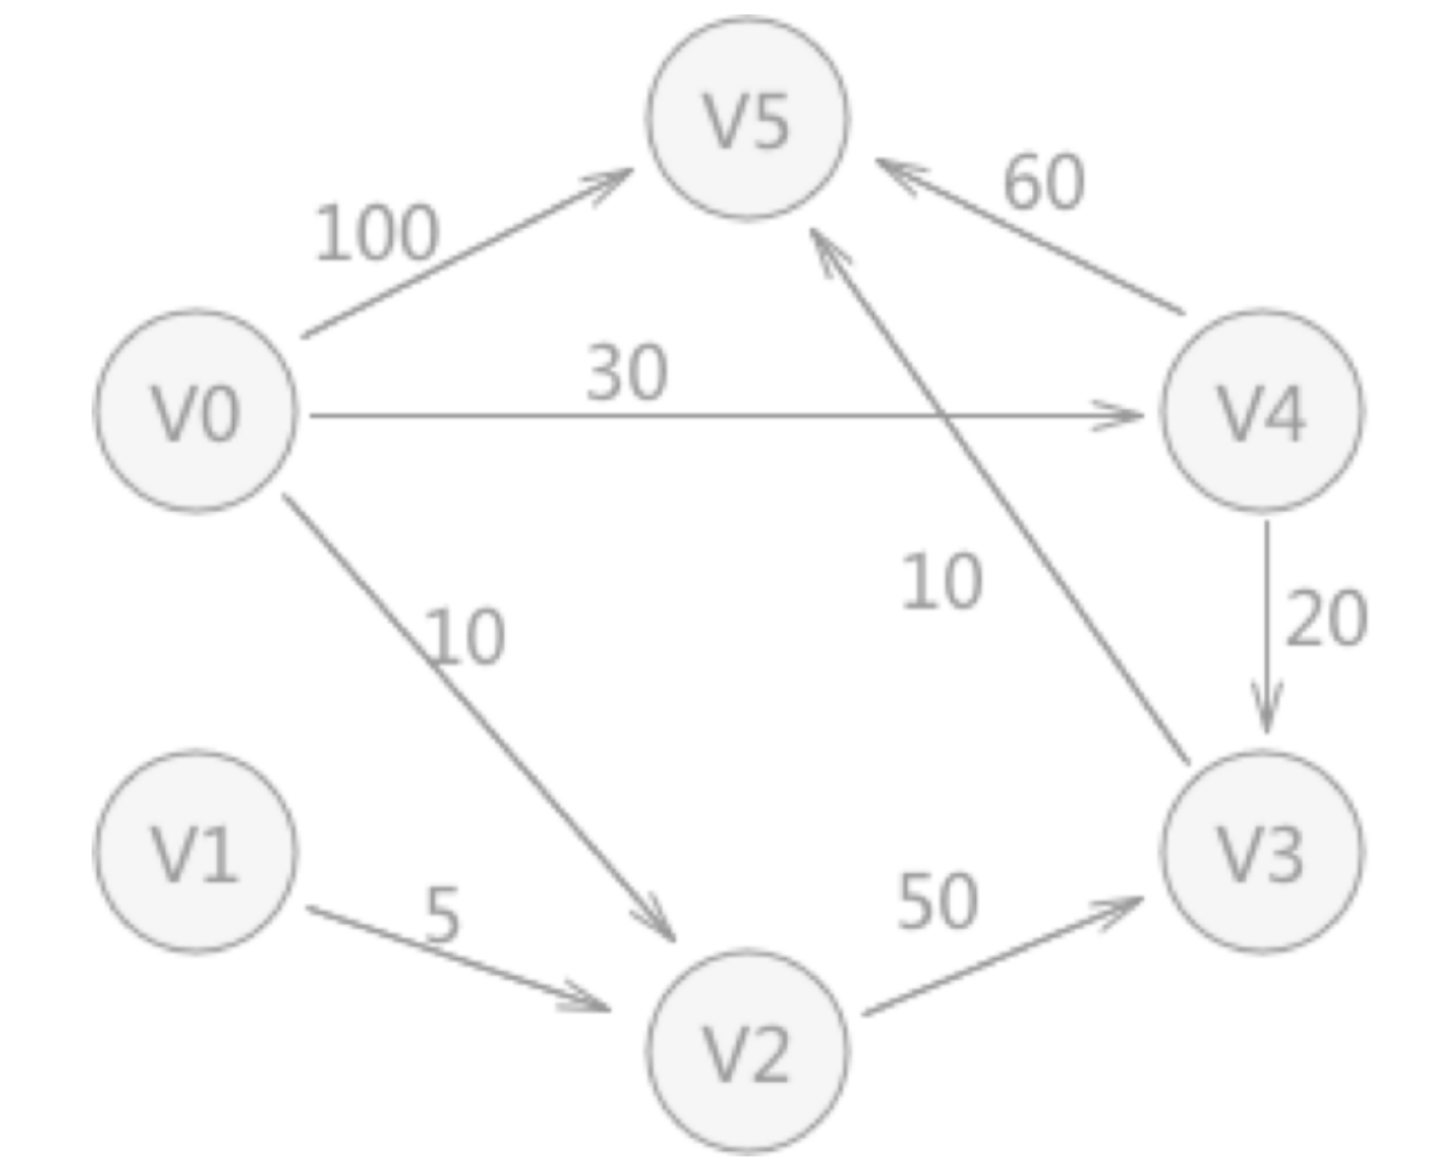

### 3. 创建图类对象，并根据上图添加顶点和弧边

In [2]:
vexnum = 6 # 顶点个数
V0, V1, V2, V3, V4, V5 = range(vexnum)
vexs = ['V0', 'V1', 'V2', 'V3', 'V4', 'V5'] # 顶点数据
relation_UDG = [[V0, V2, 10], [V0, V4, 30], [V0, V5, 100], [V1, V2, 5], [V2, V3, 50], [V3, V5, 10], [V4, V3, 20], [V4, V5, 60]] # 存储顶点之间关系
graph_UDG = Graph(vexs)
# 有向网，返回邻接矩阵
matrix_UDG = graph_UDG.CreateUDG(relation_UDG)
for UDG in matrix_UDG:
    print(UDG)

[0, inf, 10, inf, 30, 100]
[inf, 0, 5, inf, inf, inf]
[inf, inf, 0, 50, inf, inf]
[inf, inf, inf, 0, inf, 10]
[inf, inf, inf, 20, 0, 60]
[inf, inf, inf, inf, inf, 0]


### 4. 调用迪杰斯特拉函数，并输出label，prior，minest

- label：记录从源点V0到Vi是否已被确定最短路径长度，True为确定，False为未确定
- prior：记录从源点V0到终点Vi的当前最短路径上Vi的直接前驱顶点序号，默认为-1
- minest：记录从源点V0到终点Vi的当前最短路径长度，默认为在∞

In [3]:
prior,minest = graph_UDG.Dijkstra(V0)

[True, False, True, True, True, True]
[0, -1, 0, 4, 0, 3]
[0, inf, 10, 50, 30, 60]


### 5. 输出V0到各顶点的最短路径

In [4]:
graph_UDG.ShowResult(V0, prior, minest)

V0无法直达V1
V0:V2  最短路径:10  路径为:V0-->V2
V0:V3  最短路径:50  路径为:V0 --> V4 --> V3
V0:V4  最短路径:30  路径为:V0-->V4
V0:V5  最短路径:60  路径为:V0 --> V4 --> V3 --> V5


### 6. 测试案例2

![Image Name](https://cdn.kesci.com/upload/image/qwzjfrn11a.png?imageView2/0/w/640/h/640)
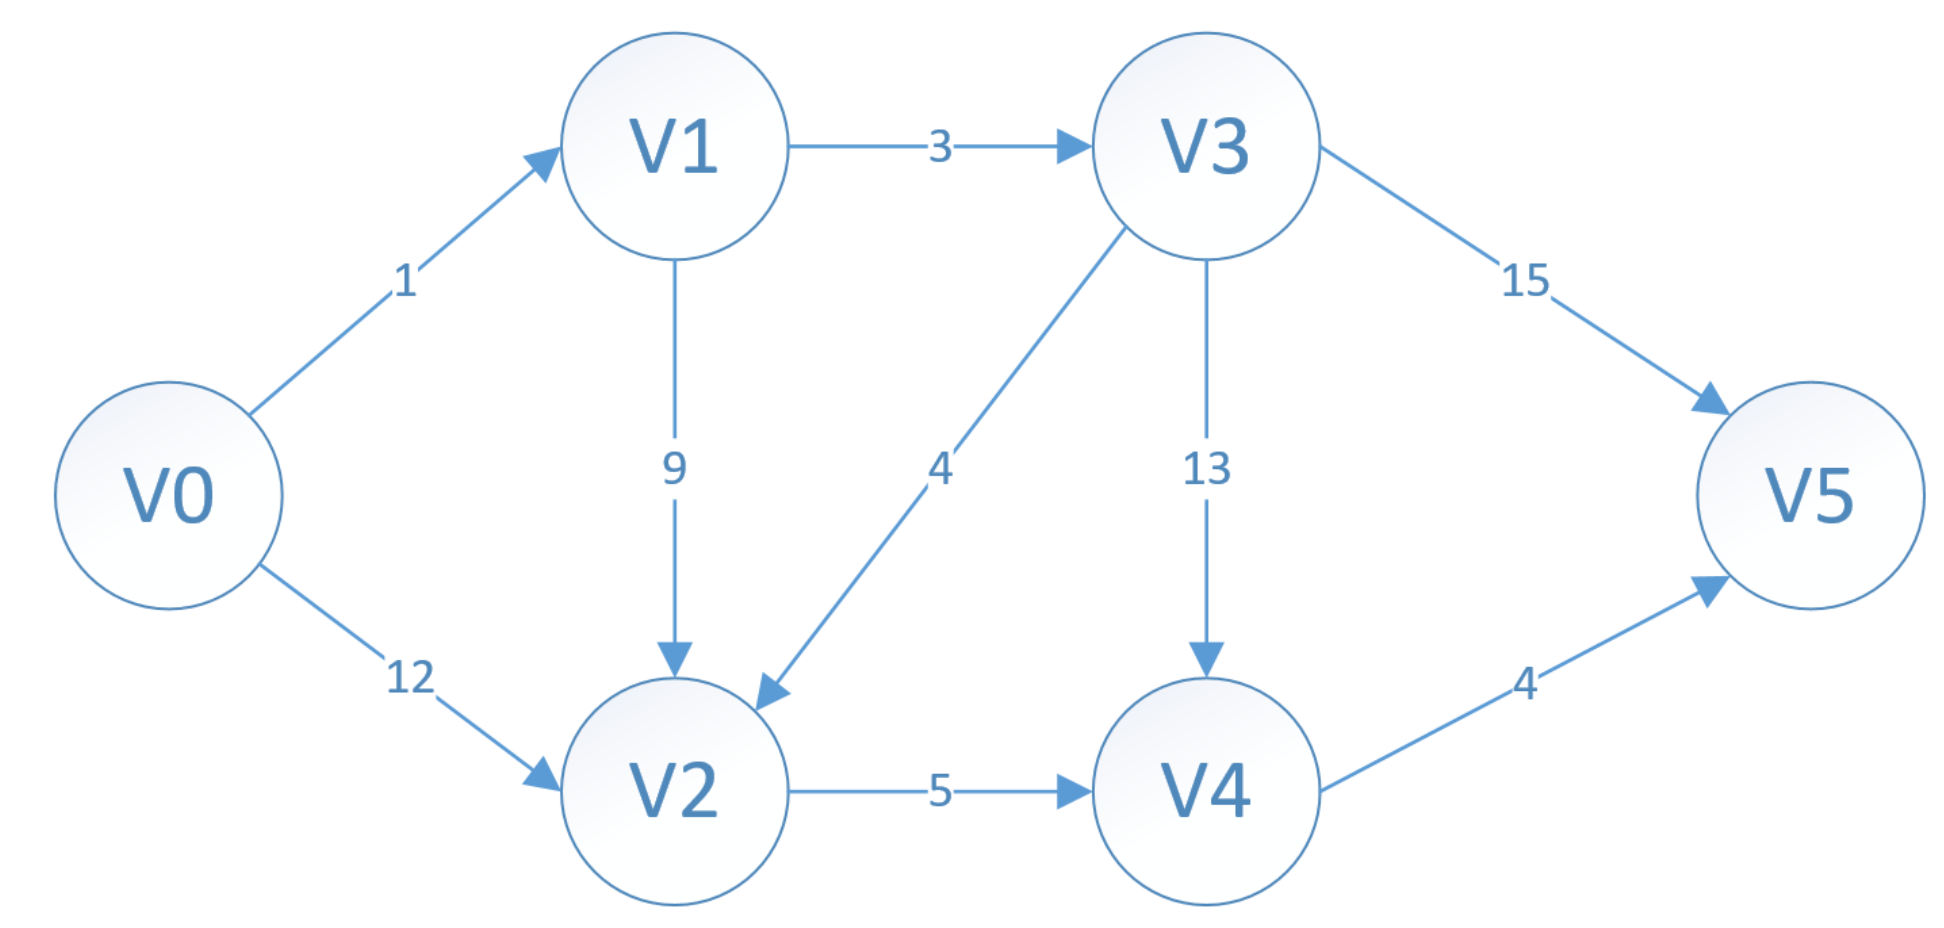

### 7. 同理，创建图类对象，并根据上图添加顶点和弧边

In [5]:
vexnum = 6 # 顶点个数
V0, V1, V2, V3, V4, V5 = range(vexnum)
vexs = ['V0', 'V1', 'V2', 'V3', 'V4', 'V5'] # 顶点数据
relation_UDG = [[V0, V1, 1], [V0, V2, 12], [V1, V2, 9], [V1, V3, 3], [V2, V4, 5], [V3, V2, 4], [V3, V4, 13], [V3, V5, 15], [V4, V5, 4]] # 存储顶点之间关系
graph_UDG = Graph(vexs)
# 有向网，返回邻接矩阵
matrix_UDG = graph_UDG.CreateUDG(relation_UDG)
for UDG in matrix_UDG:
    print(UDG)

[0, 1, 12, inf, inf, inf]
[inf, 0, 9, 3, inf, inf]
[inf, inf, 0, inf, 5, inf]
[inf, inf, 4, 0, 13, 15]
[inf, inf, inf, inf, 0, 4]
[inf, inf, inf, inf, inf, 0]


### 8. 同理，调用迪杰斯特拉函数，并输出label，prior，minest

In [6]:
prior,minest = graph_UDG.Dijkstra(V0)

[True, True, True, True, True, True]
[0, 0, 3, 1, 2, 4]
[0, 1, 8, 4, 13, 17]


### 9. 输出V0到各顶点的最短路径

In [7]:
graph_UDG.ShowResult(V0, prior, minest)

V0:V1  最短路径:1  路径为:V0-->V1
V0:V2  最短路径:8  路径为:V0 --> V1 --> V3 --> V2
V0:V3  最短路径:4  路径为:V0 --> V1 --> V3
V0:V4  最短路径:13  路径为:V0 --> V1 --> V3 --> V2 --> V4
V0:V5  最短路径:17  路径为:V0 --> V1 --> V3 --> V2 --> V4 --> V5
